# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [72]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [86]:
#your code here
 
df = pd.read_csv('wnba_clean.csv',index_col=0)
df

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


**Use describe() to take an initial look at the data.**

In [81]:
#your code here
df.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,27.112676,24.429577,500.105634,74.401408,168.704225,43.102817,14.830986,43.697183,24.978169,39.535211,49.422535,75.828873,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,3.667180,7.075477,289.373393,55.980754,117.165809,9.855199,17.372829,46.155302,18.459075,36.743053,44.244697,18.536151,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,24.000000,22.000000,242.250000,27.000000,69.000000,37.125000,0.000000,3.000000,0.000000,13.000000,17.250000,71.575000,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.500000,506.000000,69.000000,152.500000,42.050000,10.500000,32.000000,30.550000,29.000000,35.500000,80.000000,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,752.500000,105.000000,244.750000,48.625000,22.000000,65.500000,36.175000,53.250000,66.500000,85.925000,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,225.000000,100.000000,168.000000,186.000000,100.000000,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          142 non-null    object 
 1   Team          142 non-null    object 
 2   Pos           142 non-null    object 
 3   Height        142 non-null    int64  
 4   Weight        142 non-null    int64  
 5   BMI           142 non-null    float64
 6   Birth_Place   142 non-null    object 
 7   Birthdate     142 non-null    object 
 8   Age           142 non-null    int64  
 9   College       142 non-null    object 
 10  Experience    142 non-null    object 
 11  Games Played  142 non-null    int64  
 12  MIN           142 non-null    int64  
 13  FGM           142 non-null    int64  
 14  FGA           142 non-null    int64  
 15  FG%           142 non-null    float64
 16  3PM           142 non-null    int64  
 17  3PA           142 non-null    int64  
 18  3P%           142 non-null    

Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [76]:
df=df[df["Games Played"] > 30][["MIN","Age"]]

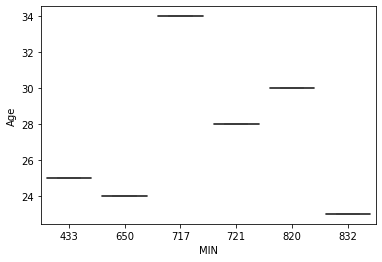

In [77]:
sns.boxplot(data=df ,x="MIN",y="Age")

In [83]:
df=df[df["Age"] >=35][["Games Played","MIN"]]

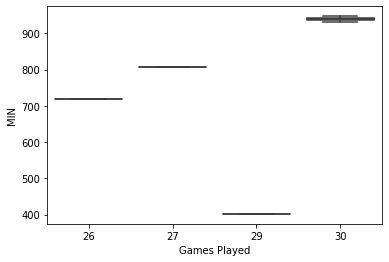

In [84]:
sns.boxplot(data=df ,x="Games Played",y="MIN")

In [89]:
df=df[df["Age"] >20][["Games Played","MIN"]]

In [93]:
#sns.pairplot(df, hue="MIN", height=2.5)

In [28]:
#your code here
corrMatrix=df.corr()
corrMatrix

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
Height,1.000000,0.770489,0.163703,-0.107125,-0.146742,-0.140038,-0.048719,-0.147097,0.233682,-0.328597,-0.359546,-0.255198,-0.059440,-0.027620,-0.274055,0.353680,0.221064,0.272597,-0.445325,-0.181034,0.350921,-0.211953,-0.087219,0.200338,0.081493
Weight,0.770489,1.000000,0.752237,-0.049890,-0.214920,-0.233388,-0.148116,-0.231564,0.214274,-0.341832,-0.374683,-0.237746,-0.117581,-0.094195,-0.184566,0.238818,0.080622,0.134072,-0.445231,-0.259023,0.172917,-0.280432,-0.175402,0.104744,0.000162
BMI,0.163703,0.752237,1.000000,0.043729,-0.176460,-0.210939,-0.176812,-0.201462,0.083570,-0.189552,-0.208457,-0.093043,-0.112065,-0.107608,-0.002148,0.010999,-0.091939,-0.063488,-0.237706,-0.210581,-0.089385,-0.217438,-0.177784,-0.042477,-0.076725
Age,-0.107125,-0.049890,0.043729,1.000000,0.125768,0.239304,0.169818,0.168012,0.121423,0.191551,0.186789,0.036811,0.105345,0.083017,-0.013643,0.009165,0.109977,0.082987,0.252346,0.205229,0.020437,0.194990,0.171281,-0.001498,0.089587
Games Played,-0.146742,-0.214920,-0.176460,0.125768,1.000000,0.720852,0.577032,0.612887,-0.007503,0.365068,0.397066,0.159981,0.461075,0.489715,0.364616,0.454058,0.542430,0.538318,0.438520,0.564111,0.302149,0.623669,0.574315,0.203783,0.054592
MIN,-0.140038,-0.233388,-0.210939,0.239304,0.720852,1.000000,0.909341,0.925602,0.197540,0.552407,0.566441,0.276086,0.761087,0.775032,0.315368,0.570110,0.785981,0.752312,0.730973,0.831106,0.477939,0.888612,0.910739,0.442809,0.113579
FGM,-0.048719,-0.148116,-0.176812,0.169818,0.577032,0.909341,1.000000,0.966875,0.304228,0.515272,0.504907,0.259767,0.806854,0.816840,0.282001,0.592976,0.819473,0.783919,0.636255,0.730659,0.573590,0.854568,0.983840,0.602962,0.163950
FGA,-0.147097,-0.231564,-0.201462,0.168012,0.612887,0.925602,0.966875,1.000000,0.147302,0.623531,0.637468,0.301783,0.822308,0.824340,0.316079,0.499610,0.756413,0.708533,0.688914,0.765703,0.482597,0.871584,0.975606,0.495464,0.154574
FG%,0.233682,0.214274,0.083570,0.121423,-0.007503,0.197540,0.304228,0.147302,1.000000,-0.125808,-0.183280,-0.030032,0.138890,0.159965,-0.181398,0.372366,0.327976,0.356356,0.044007,0.092710,0.321739,0.175041,0.241644,0.304268,0.040281
3PM,-0.328597,-0.341832,-0.189552,0.191551,0.365068,0.552407,0.515272,0.623531,-0.125808,1.000000,0.981020,0.487829,0.461152,0.414541,0.286830,-0.055592,0.236922,0.155007,0.535717,0.463660,0.062378,0.493734,0.601229,0.054784,0.122439


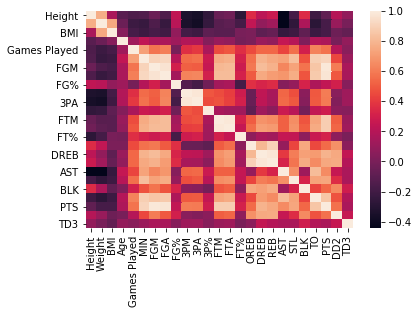

In [42]:
sns.heatmap(corrMatrix, annot=False)
plt.show()

<h1>My Comment </h1>
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and lighter the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

In [43]:
""" First look the diagonal one which is positive correlated. The darker color is week correlation and no linear trend between 
variables. Example Height is no linear trend with AST,3PA,...but there is relation with BLK and 
PTS... We can tell more using the graphy. Another General Example is FG% t which is positive correlate with almost all of variables
FT% ,FTM also but week in some where"""


' First look the diagonal one which is positive correlated. The darker color is week correlation and no linear trend between \nvariables. Example Height is no linear trend with AST,3PA,...but there is relation with BLK and \nPTS... We can tell more using the graphy. Another General Example is FG% t which is positive correlate with almost all of variables\nFT% ,FTM also but week in some where'

### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

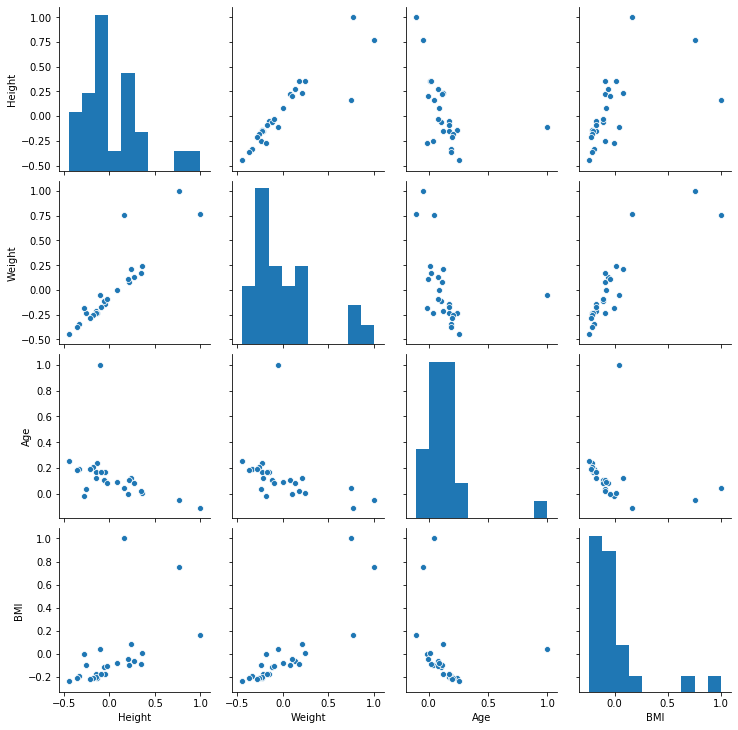

In [20]:
#your code here
sns.pairplot(corrMatrix,vars = ['Height','Weight','Age','BMI'])

**What conclusions do you think we can take from this plots?**
<h1> My comment here</h1>
The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. For example, the left-most plot in the second row shows the scatter plot of Height versus Weight

In [6]:
#your conclusions here


In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

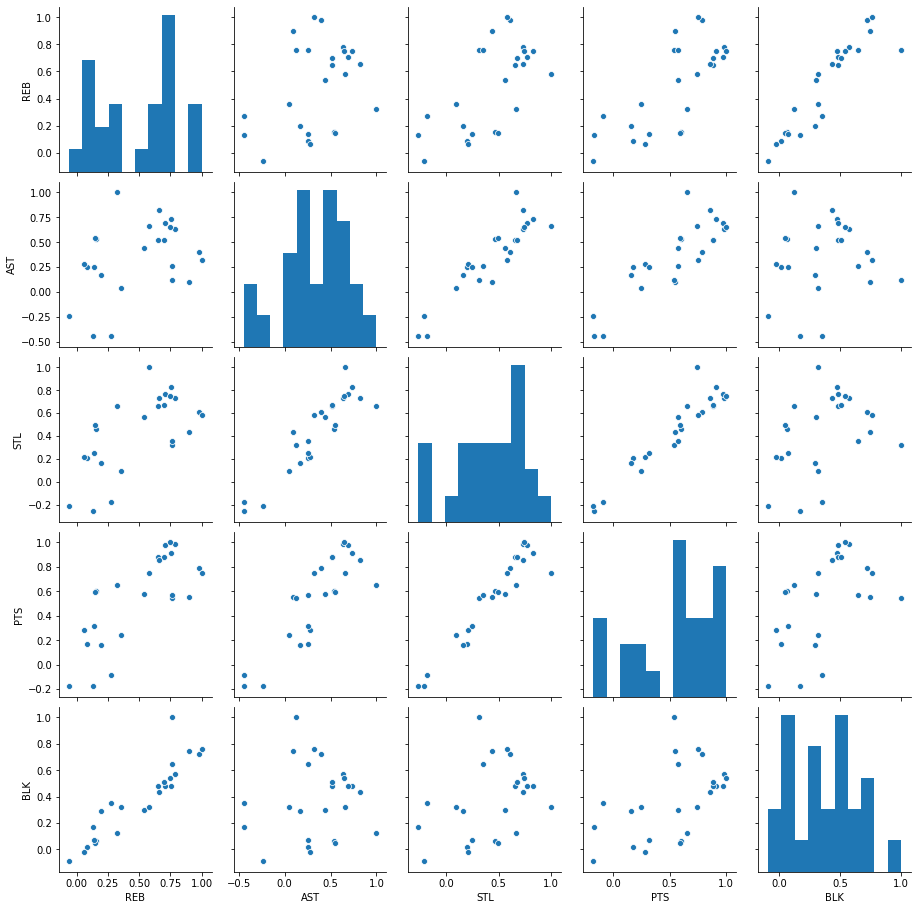

In [21]:
#your code here
sns.pairplot(corrMatrix,vars = ['REB','AST','STL','PTS','BLK'])

**What conclusions do you think we can take from this plots?**


In [ ]:
#your conclusions here


As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

In [10]:
#your code here

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [ ]:
#your comments here